In [308]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from skimage import io
df_poke = pd.read_csv('Pokemon.csv')
df_poke_kr = pd.read_csv('pokemon_kr.csv', encoding='cp949')
df_poke_kr = df_poke_kr.rename(columns = {'num':'pokedex_number'})
df_poke = df_poke.rename(columns = {'#':'pokedex_number'})
df_poke2 = pd.read_csv('pokemon_2.csv')
df_poke3 = pd.read_csv('Pokedex_Ver3.csv')
# df_poke_kr = pd.merge(df_poke,df_poke_kr, how = 'left', on ='pokedex_number')
df_pokemon_kr = pd.merge(df_poke2,df_poke_kr, how = 'left', on ='pokedex_number')
# df_poke = df_poke.drop(columns = ['Type 1', 'Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary'])
# df_pokemon_kr = pd.merge(df_pokemon_kr, df_poke, how = 'left', on = 'pokedex_number')
df_combats = pd.read_csv('combats.csv')

In [314]:
df_pokemon_kr.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,788.000000,808.000000,703.000000,808.000000,808.000000,808.000000,808.000000,788.000000,808.000000,808.000000
mean,0.995668,1.064047,0.969059,1.069616,1.068379,1.058787,1.135520,1.189356,0.990099,1.033106,...,1.156472,68.918317,55.155761,401.900990,71.581683,71.147277,66.607673,60.845685,3.694307,0.089109
std,0.598024,0.443699,0.351535,0.653981,0.519937,0.719017,0.689616,0.605022,0.562589,0.785697,...,1.078422,26.547533,20.261623,230.633667,32.367059,27.965891,28.982724,109.012883,1.922763,0.285077
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.500000,50.000000,50.000000,202.750000,45.750000,50.000000,45.000000,8.575000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,404.500000,65.000000,67.000000,65.000000,27.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,600.250000,93.250000,90.000000,86.000000,63.000000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [382]:
#불필요한 컬럼 제거
col = []
for c in df_pokemon_kr.columns:
    if c not in ['base_egg_steps','base_happiness','capture_rate','height_m','japanese_name','percentage_male','weight_kg']:
        col.append(c)

In [383]:
df_pokemon = df_pokemon_kr[col]

In [384]:
df_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_total', 'classfication', 'defense', 'experience_growth', 'hp',
       'name', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1',
       'type2', 'generation', 'is_legendary', 'nm_kr'],
      dtype='object')

In [385]:
#한글이름없을경우 영어이름으로 채우기
df_pokemon['nm_kr'].fillna(df_pokemon['name'], inplace=True)

c:\users\81149\venv\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



stat

In [425]:
col_stat = ['attack'
,'defense'
,'hp'
,'name'
,'pokedex_number'
,'sp_attack'
,'sp_defense','is_legendary','speed','base_total','nm_kr','generation']

In [426]:
df_stat = df_pokemon[col_stat]

In [427]:
df_stat =  pd.melt(df_stat,['pokedex_number','name','nm_kr','is_legendary','generation'])

In [410]:
df_legend = df_stat[df_stat['is_legendary']== 1]
df_notlg = df_stat[df_stat['is_legendary']== 0]

against

In [400]:
col_against = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water','is_legendary','nm_kr','generation','name'
,'pokedex_number']

In [401]:
df_against = df_pokemon[col_against]
df_against =  pd.melt(df_against,['pokedex_number','name','nm_kr','is_legendary','generation'])

# 주제 1 

In [429]:
list_poke = [25,6,131,143,153,164]
df_now = df_stat.loc[df_stat['pokedex_number'].isin(list_poke)]
df_now = df_now[df_now['variable'] != 'base_total']
df_now_ag = df_against.loc[df_against['pokedex_number'].isin(list_poke)]


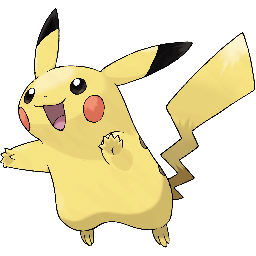


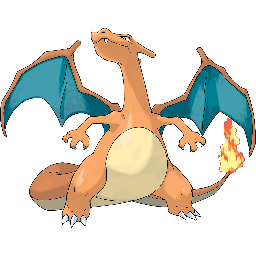


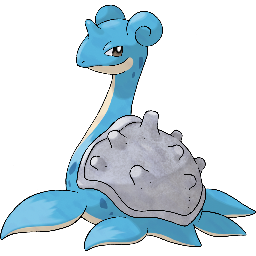


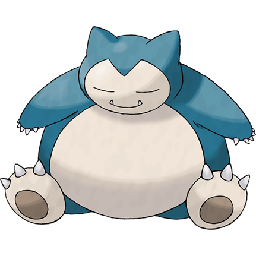


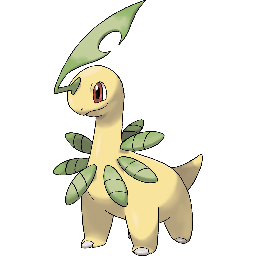


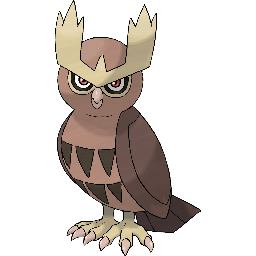

In [403]:
for i in list_poke:
    pokedex_number = i
    img = io.imread(f'./pokemon/{i}.png')
    fig = px.imshow(img)
    fig.show()

In [418]:
df_now_stat = df_pokemon.loc[df_pokemon['pokedex_number'].isin(list_poke)]
df_now_stat[col_against].min()

against_bug            0.25
against_dark              1
against_dragon            1
against_electric        0.5
against_fairy           0.5
against_fight           0.5
against_fire            0.5
against_flying          0.5
against_ghost             0
against_grass          0.25
against_ground            0
against_ice            0.25
against_normal            1
against_poison            1
against_psychic           1
against_rock              1
against_steel           0.5
against_water           0.5
is_legendary              0
nm_kr                  라프라스
generation                1
name                Bayleef
pokedex_number            6
dtype: object

In [405]:
df_now_ag

,pokedex_number,name,nm_kr,is_legendary,generation,variable,value
5,6,Charizard,리자몽,0,1,against_bug,0.25
24,25,Pikachu,피카츄,0,1,against_bug,1.00
130,131,Lapras,라프라스,0,1,against_bug,1.00
142,143,Snorlax,잠만보,0,1,against_bug,1.00
152,153,Bayleef,베이리프,0,2,against_bug,2.00
...,...,...,...,...,...,...,...
13760,25,Pikachu,피카츄,0,1,against_water,1.00
13866,131,Lapras,라프라스,0,1,against_water,0.50
13878,143,Snorlax,잠만보,0,1,against_water,1.00
13888,153,Bayleef,베이리프,0,2,against_water,0.50


In [430]:
fig = px.line_polar(df_now, r="value", theta="variable", color="nm_kr", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()

In [333]:
fig = px.line_polar(df_now_ag, r="value", theta="variable", color="nm_kr", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()

현재 포켓몬의 약점 =>dark,dragon,normal,poison,psychic,rock 타입에 약함

전체 포켓몬 타입

In [334]:
#전체데이터 type1
labels = df_pokemon['type1'].unique()
values = df_pokemon['type1'].value_counts()
fig = go.Figure(data = [go.Pie(labels = labels, values = values)])
fig.show()

In [336]:
#전체데이터 type2
fig = px.histogram(df_pokemon, x = 'type2').update_xaxes(categoryorder = 'total descending')
fig.show()

dark,dragon,normal,poison,psychic,rock타입에 강한 타입 찾기

In [337]:
col_type = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'type1', 'type2']
df_type = df_pokemon[col_type]
df_type = df_type[df_type['type2'].isna()].drop_duplicates()

In [338]:
df_type_melt = pd.melt(df_type,['type1', 'type2'])
fig = px.line_polar(df_type_melt, r="value", theta="variable", color="type1", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

In [339]:
df_type[df_type['against_rock']<1]

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1,type2
55,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,fighting,NaN
103,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.5,1.0,0.5,1.0,2.0,ground,NaN
378,0.5,1.0,0.5,1.0,0.5,2.0,2.0,0.5,1.0,0.5,2.0,0.5,0.5,0.0,0.5,0.5,0.5,1.0,steel,NaN


In [340]:
df_type[df_type['against_normal']<1]

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1,type2
184,1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.5,1.0,2.0,2.0,1.0,0.5,0.5,1.0,1.0,2.0,2.0,rock,NaN
199,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0,ghost,NaN
378,0.5,1.0,0.5,1.0,0.5,2.0,2.0,0.5,1.0,0.5,2.0,0.5,0.5,0.0,0.5,0.5,0.5,1.0,steel,NaN


In [341]:
df_type[df_type['against_dark']<1]

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1,type2
34,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,fairy,NaN
55,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,fighting,NaN
196,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,dark,NaN


=> rock, posion 강한 타입 = steel , ground

=> normal, dragon 강한 타입 = ghost, steel

=> dark,psychic 강한 타입 =  dark, fairy 

In [342]:
df_hm = df_pokemon[df_pokemon['type2']!='None'].groupby(['type1', 'type2']).size().unstack()
fig = px.imshow(df_hm)
fig.show()

steel,ground인 포켓몬1, dark, ghost인 포켓몬 1을 찾는다

In [372]:
list_add_poke = []

In [373]:
c1 = df_pokemon['type1']=='steel'
c2 = df_pokemon['type2']=='ground'
print(df_pokemon[c1&c2].nm_kr.item())
print(df_pokemon[c1&c2].pokedex_number.item())
list_add_poke.append(df_pokemon[c1&c2].pokedex_number.item())

강철톤
208


In [374]:
c1 = df_pokemon['type1']=='ground'
c2 = df_pokemon['type2']=='steel'
print(df_pokemon[c1&c2].nm_kr.item())
print(df_pokemon[c1&c2].pokedex_number.item())
list_add_poke.append(df_pokemon[c1&c2].pokedex_number.item())

535    몰드류
Name: nm_kr, dtype: object
535    530
Name: pokedex_number, dtype: int64


In [375]:
c1 = df_pokemon['type1']=='ghost'
c2 = df_pokemon['type2']=='dark'
print(df_pokemon[c1&c2].nm_kr.item())
print(df_pokemon[c1&c2].pokedex_number.item())
list_add_poke.append(df_pokemon[c1&c2].pokedex_number.item())

화강돌
442


In [376]:
c1 = df_pokemon['type1']=='dark'
c2 = df_pokemon['type2']=='ghost'
print(df_pokemon[c1&c2].nm_kr.item())
print(df_pokemon[c1&c2].pokedex_number.item())
list_add_poke.append(df_pokemon[c1&c2].pokedex_number.item())

깜까미
302


후보포켓몬 against 정보비교

dark,dragon,normal,poison,psychic,rock타입에 강한지 확인

In [381]:
df_add_against = df_against.loc[df_against['pokedex_number'].isin(list_add_poke)]
fig = px.line_polar(df_add_against, r="value", theta="variable", color="nm_kr", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

후보포켓몬 stat비교

In [431]:
df_add_stat = df_stat.loc[df_stat['pokedex_number'].isin(list_add_poke)]
print(df_add_stat[df_add_stat['variable'] == 'base_total'])
df_add_stat = df_add_stat[df_add_stat['variable'] != 'base_total']
fig = px.line_polar(df_add_stat, r="value", theta="variable", color="nm_kr", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

      pokedex_number       name nm_kr  is_legendary  generation    variable  \
5055             208    Steelix   강철톤             0           2  base_total   
5149             302    Sableye   깜까미             0           3  base_total   
5289             442  Spiritomb   화강돌             0           4  base_total   
5383             530  Excadrill   몰드류             0           5  base_total   

      value  
5055    610  
5149    480  
5289    485  
5383    508  


=> 강철톤, 몰드류 선택

최종 포켓몬


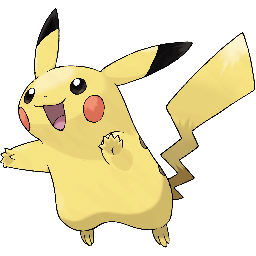


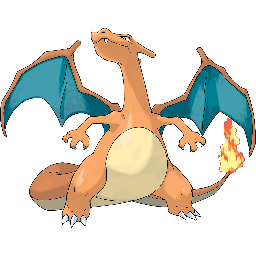


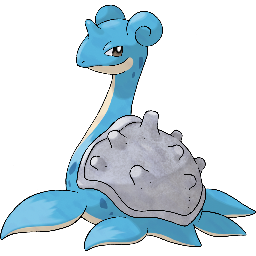


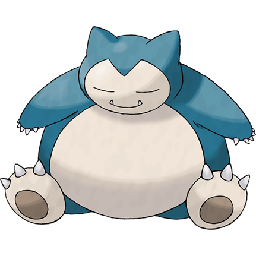


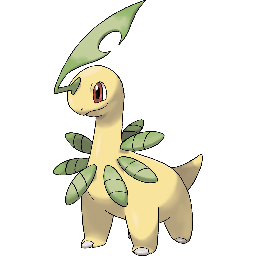


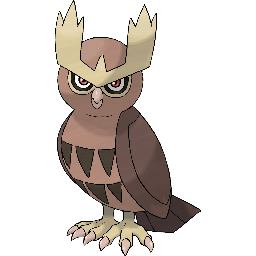


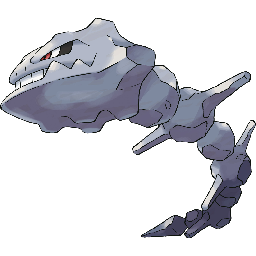


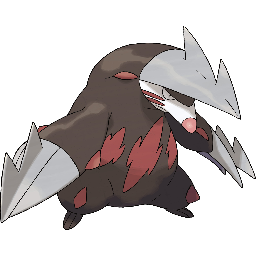

In [432]:
list_poke.append(208) 
list_poke.append(530) 
for i in list_poke:
    pokedex_number = i
    img = io.imread(f'./pokemon/{i}.png')
    fig = px.imshow(img)
    fig.show()